#### 1. Bibliotecas

In [69]:
import re
import csv
import spacy
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dir_logs = 'logs/' # Diretório onde estão os logs.

#### 2. Definições

In [70]:
frase_padrao = re.compile(r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2})\.\d+Z (\d+) examples, (\d+) failures')

#### 3. Dataframe para estruturar o log.

In [71]:
df_log_estruturado = pd.DataFrame(columns=['Número log', 'Data', 'Hora', 'Exemplos', 'Falhas'])
df_log_estruturado

,Número log,Data,Hora,Exemplos,Falhas


#### 4. Varrer todas as pastas de log geradas e filtrar apenas os dados de failure

In [72]:
def buscar_failures_logs(log : str, numero_log : str) -> pd.DataFrame:
    """
    Função que busca as informações de falhas e exemplos nos logs.
    
    Parâmetros:
        log (str) : Log que será analisado.
        numero_log (str) : Número do log.
    
    Retorno:
        df_temp_logs (pd.DataFrame) : DataFrame com as informações de falhas e exemplos.
    """
    
    # Buscar informações no log que tenham a estrutura da frase_padrao.
    informacoes = frase_padrao.findall(log)

    if len(informacoes) > 0:

        # Criar dicionário apenas com as chaves.
        dicionario = {'Número log' : [], 'Data' : [], 'Hora' : [], 'Exemplos' : [], 'Falhas' : []}

        for informacao in informacoes:
            
            # Crie um dicionário com as informações capturadas 'Data' : '2024-03-01' 'Hora' : '20:36:16', 'Exemplos' : 254, 'Falhas' : 6.
            data_hora = informacao[0].split('T')

            # Adicionar as informações no dicionário.
            dicionario['Número log'].append(numero_log)
            dicionario['Data'].append(data_hora[0])
            dicionario['Hora'].append(data_hora[1])
            dicionario['Exemplos'].append(int(informacao[1]))
            dicionario['Falhas'].append(int(informacao[2]))

        return pd.DataFrame(dicionario)
    return None

In [73]:
for numero_log in os.listdir(dir_logs):                 # Para todos os diretórios de log. 81821****
    for file in os.listdir(f'{dir_logs}/{numero_log}'):      # Dentro de todos os dir e arquivos de um log.
        if file.startswith('rspec-events'):                           # Apenas as pastas que tem o arquivo 7_Run rspec.txt
            with open(f'{dir_logs}/{numero_log}/{file}/7_Run rspec with events.txt') as file_log_txt:
                log = file_log_txt.read()                             # Lê o arquivo de log.
                df_temp_logs = buscar_failures_logs(log, numero_log)  # Chama a função que busca logs.
                if df_temp_logs is not None:
                    df_log_estruturado = pd.concat([df_log_estruturado, df_temp_logs], ignore_index=True)

In [74]:
df_log_estruturado

,Número log,Data,Hora,Exemplos,Falhas
0,7951714848,2024-02-18,21:08:29,595,0
1,7962350653,2024-02-19,16:09:23,493,0
2,8035195268,2024-02-25,03:20:39,503,0
3,8038831497,2024-02-25,15:04:56,460,0
4,8038894645,2024-02-25,15:13:59,523,0
5,8038894645,2024-02-25,15:14:01,556,2
6,8038909780,2024-02-25,15:17:27,476,0
7,8116824405,2024-03-01,20:28:06,560,0
8,8116889855,2024-03-01,20:34:47,645,0
9,8117011742,2024-03-01,20:47:17,0,0


In [75]:
# Use datetime to aggregate the Date and Hour columns for further operations.

df_log_estruturado['DateTime'] = pd.to_datetime(df_log_estruturado['Data'] + ' ' + df_log_estruturado['Hora'])
df_log_estruturado.sort_values('DateTime', inplace=True)

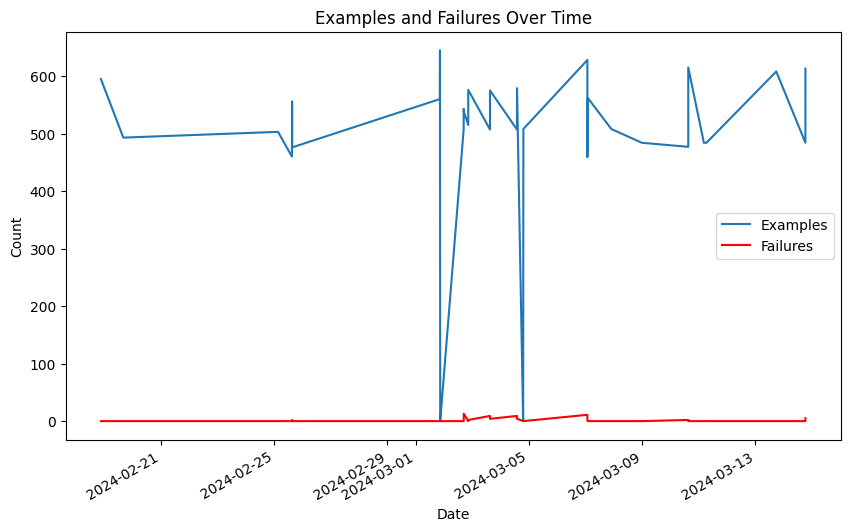

In [76]:
# Examples and Failures over time. Here each example is number of tests and failures are number of tests that failed.

plt.figure(figsize=(10, 6))
plt.plot(df_log_estruturado['DateTime'], df_log_estruturado['Exemplos'], label='Examples')
plt.plot(df_log_estruturado['DateTime'], df_log_estruturado['Falhas'], label='Failures', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Examples and Failures Over Time')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels
plt.show()

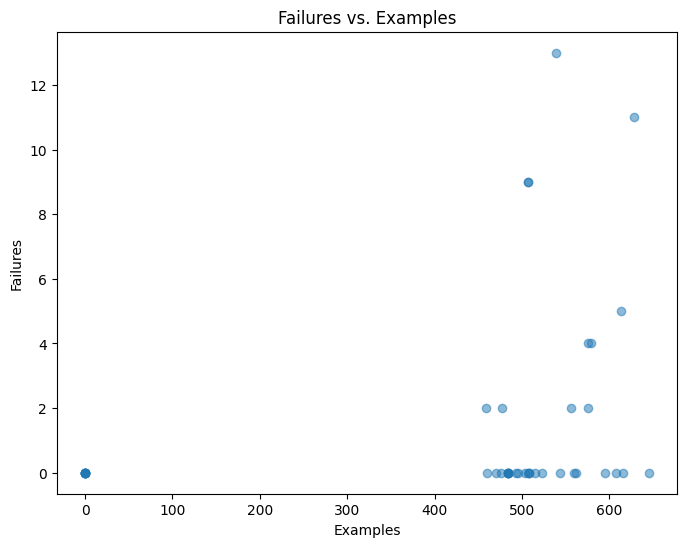

In [77]:
# 2. Scatter Plot - Failures vs. Examples
plt.figure(figsize=(8, 6))
plt.scatter(df_log_estruturado['Exemplos'], df_log_estruturado['Falhas'], alpha=0.5)
plt.xlabel('Examples')
plt.ylabel('Failures')
plt.title('Failures vs. Examples')
plt.show()

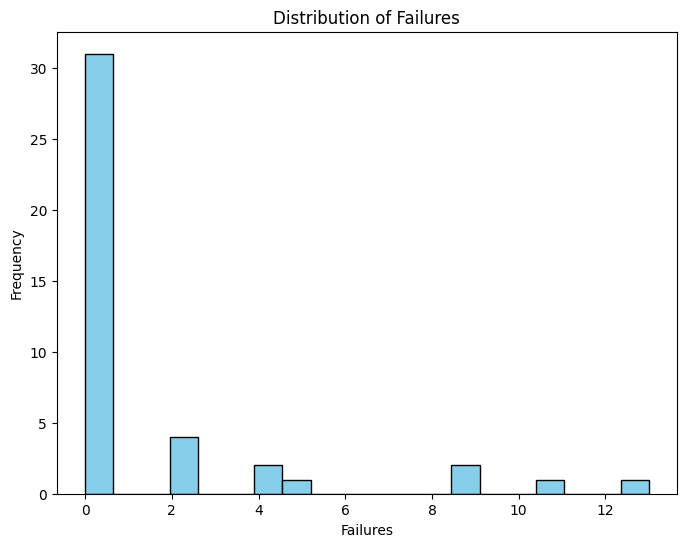

In [78]:
# 4. Histogram - Distribution of Failures - Frequency
plt.figure(figsize=(8, 6))
plt.hist(df_log_estruturado['Falhas'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Failures')
plt.ylabel('Frequency')
plt.title('Distribution of Failures')
plt.show()

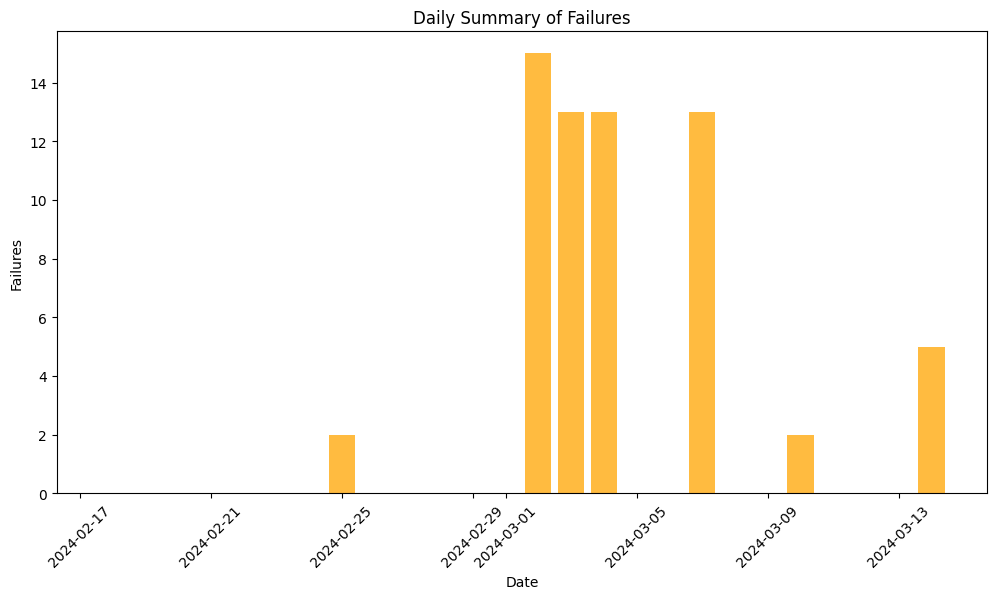

In [79]:
# Histogram of failures for the analyzed period.

# Group by the date, summing only specific columns
# Assuming 'Exemplos' and 'Falhas' are the columns you want to sum
df_daily_summary = df_log_estruturado.groupby(df_log_estruturado['DateTime'].dt.date)[['Exemplos', 'Falhas']].sum()

# Reset index to make 'DateTime' a column again, useful for plotting
df_daily_summary.reset_index(inplace=True)

# Now plotting the daily summary of failures
plt.figure(figsize=(12, 6))
plt.bar(df_daily_summary['DateTime'], df_daily_summary['Falhas'], color='orange', alpha=0.75)
plt.xlabel('Date')
plt.ylabel('Failures')
plt.title('Daily Summary of Failures')
plt.xticks(rotation=45)
plt.show()


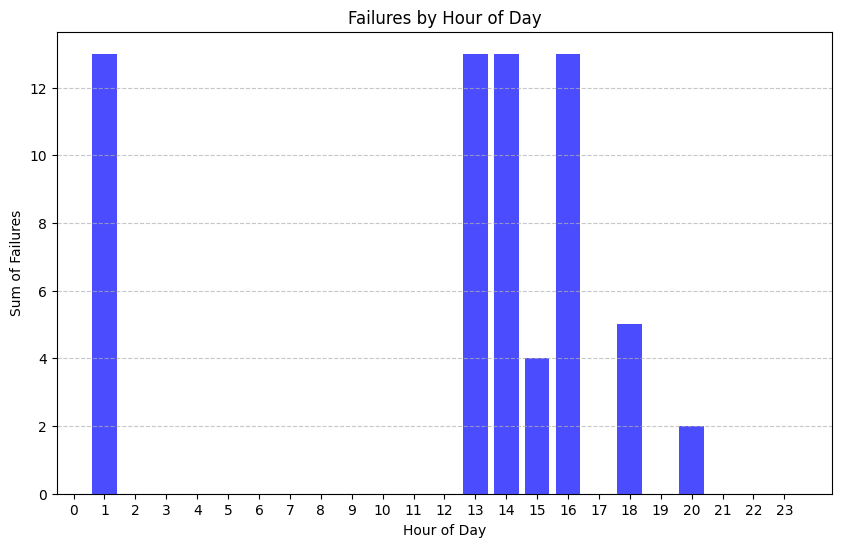

In [80]:
# Failures by Hour of the Day.

# Extract hour from the DateTime
df_log_estruturado['Hour'] = df_log_estruturado['DateTime'].dt.hour

# Group by Hour and sum failures
df_failures_by_hour = df_log_estruturado.groupby('Hour')['Falhas'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_failures_by_hour['Hour'], df_failures_by_hour['Falhas'], color='blue', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Sum of Failures')
plt.title('Failures by Hour of Day')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


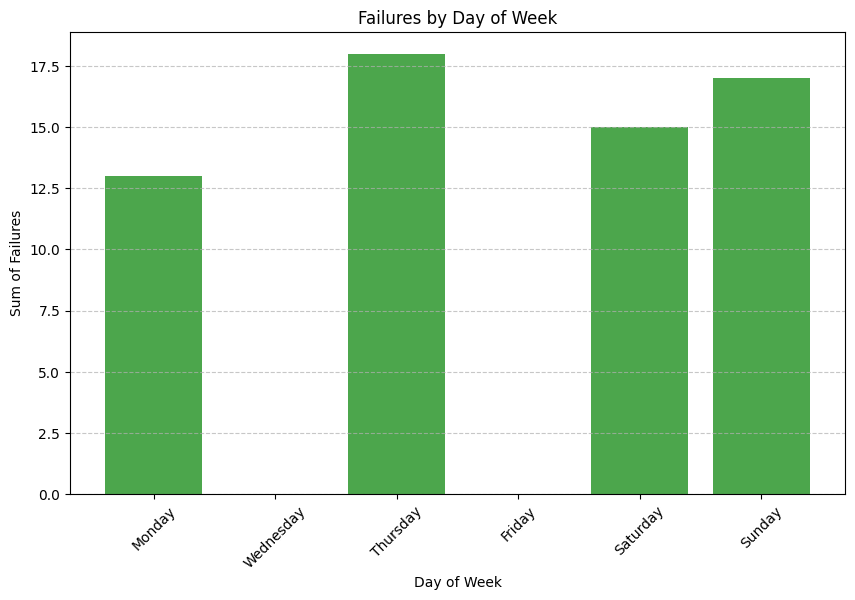

In [81]:
# Failures by day of week.

# Extract day of the week
df_log_estruturado['DayOfWeek'] = df_log_estruturado['DateTime'].dt.dayofweek

# Group by DayOfWeek and sum failures
df_failures_by_dayofweek = df_log_estruturado.groupby('DayOfWeek')['Falhas'].sum().reset_index()

# Map the day of the week from numbers to names for better readability
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_failures_by_dayofweek['DayOfWeek'] = df_failures_by_dayofweek['DayOfWeek'].apply(lambda x: days[x])

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df_failures_by_dayofweek['DayOfWeek'], df_failures_by_dayofweek['Falhas'], color='green', alpha=0.7)
plt.xlabel('Day of Week')
plt.ylabel('Sum of Failures')
plt.title('Failures by Day of Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Teste por fora.

In [82]:
# Section 1: Start Extrating relevant part of the log
log_data = """
2024-03-01T20:34:05.7910724Z ##[group]Run RUBYOPT='-W:no-deprecated -W:no-experimental' bin/knapsack_pro_rspec
2024-03-01T20:34:05.7911729Z [36;1mRUBYOPT='-W:no-deprecated -W:no-experimental' bin/knapsack_pro_rspec[0m
2024-03-01T20:34:05.7939895Z shell: /usr/bin/bash -e {0}
2024-03-01T20:34:05.7940255Z env:
2024-03-01T20:34:05.7940577Z   POSTGRES_HOST: localhost
2024-03-01T20:34:05.7941049Z   DATABASE_HOST: localhost
2024-03-01T20:34:05.7941429Z   PG_USERNAME: postgres
2024-03-01T20:34:05.7941799Z   PG_PASSWORD: password
2024-03-01T20:34:05.7942258Z   POSTGRES_HOST_AUTH_METHOD: trust
2024-03-01T20:34:05.7942693Z   POSTGRES_PORT: 5432
2024-03-01T20:34:05.7943027Z   PGHOST: localhost
2024-03-01T20:34:05.7943437Z   PGUSER: postgres
2024-03-01T20:34:05.7943782Z   RAILS_ENV: test
2024-03-01T20:34:05.7944447Z   KNAPSACK_PRO_TEST_SUITE_TOKEN_RSPEC: ***
2024-03-01T20:34:05.7945196Z   KNAPSACK_PRO_CI_NODE_TOTAL: 6
2024-03-01T20:34:05.7945627Z   KNAPSACK_PRO_CI_NODE_INDEX: 1
2024-03-01T20:34:05.7946162Z   KNAPSACK_PRO_RSPEC_SPLIT_BY_TEST_EXAMPLES: true
2024-03-01T20:34:05.7946696Z   KNAPSACK_PRO_LOG_LEVEL: info
2024-03-01T20:34:05.7947407Z   KNAPSACK_PRO_TEST_FILE_PATTERN: {spec/system/**{,/*/**}/*_spec.rb,spec/requests/**{,/*/**}/*_spec.rb}
2024-03-01T20:34:05.7948066Z ##[endgroup]
2024-03-01T20:34:11.7995421Z I, [2024-03-01T20:34:11.799148 #2357]  INFO -- : [knapsack_pro] Generating RSpec test examples JSON report for slow test files to prepare it to be split by test examples (by individual test cases). Thanks to that, a single slow test file can be split across parallel CI nodes. Analyzing 1 slow test files.
2024-03-01T20:34:20.7801473Z Coverage report generated for RSpec to /home/runner/work/human-essentials/human-essentials/coverage. 2535 / 6668 LOC (38.02%) covered.
2024-03-01T20:34:23.0843956Z /opt/hostedtoolcache/Ruby/3.2.2/x64/bin/ruby -I/home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-core-3.12.2/lib:/home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-support-3.12.1/lib /home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-core-3.12.2/exe/rspec  --format documentation --format KnapsackPro::Formatters::TimeTracker --default-path spec "spec/system/donation_system_spec.rb" "spec/system/transfer_system_spec.rb" "spec/system/product_drive_system_spec.rb" "spec/system/admin/users_system_spec.rb" "spec/system/account_request_system_spec.rb" "spec/system/dashboard_system_spec.rb[1:2:7:6:1:1]" "spec/requests/events_requests_spec.rb" "spec/requests/admin/organizations_requests_spec.rb" "spec/requests/partners/profiles_requests_county_spec.rb" "spec/requests/storage_locations_requests_spec.rb" "spec/system/dashboard_system_spec.rb[1:2:5:9:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:8:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:5:1:3]" "spec/system/dashboard_system_spec.rb[1:2:7:4:1:1]" "spec/system/dashboard_system_spec.rb[1:2:5:4:1:3]" "spec/system/dashboard_system_spec.rb[1:2:5:4:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:2:1:1]" "spec/requests/organization_requests_spec.rb" "spec/system/partners/partner_distribution_system_spec.rb" "spec/requests/vendors_requests_spec.rb" "spec/requests/admin_requests_spec.rb" "spec/requests/product_drive_participants_requests_spec.rb" "spec/requests/adjustments_requests_spec.rb" "spec/requests/profiles_requests_spec.rb" "spec/requests/requests_requests_spec.rb" "spec/requests/attachments_requests_spec.rb" "spec/requests/static_requests_spec.rb"
2024-03-01T20:34:31.5615639Z Run options: include {:ids=>{"./spec/system/dashboard_system_spec.rb"=>["1:2:7:6:1:1", "1:2:5:9:1:2", "1:2:5:8:1:2", "1:2:5:5:1:3", "1:2:7:4:1:1", "1:2:5:4:1:3", "1:2:5:4:1:2", "1:2:5:2:1:1"]}}
2024-03-01T20:34:31.5646105Z 
2024-03-01T20:34:31.5646605Z Randomized with seed 6105
2024-03-01T20:34:32.5176178Z 
2024-03-01T20:34:32.5177279Z Vendors
2024-03-01T20:34:32.5177982Z   While signed in
2024-03-01T20:34:32.5180284Z     DELETE #destroy
2024-03-01T20:34:32.5419827Z       does not have a route for this
2024-03-01T20:34:32.5421026Z     POST #create
2024-03-01T20:34:32.6032058Z       flash error
2024-03-01T20:34:32.6189150Z       successful create
2024-03-01T20:34:32.6189757Z     Looking at a different organization
2024-03-01T20:34:32.7851556Z       redirects the user to the sign-in page for CRUD actions
2024-03-01T20:34:32.7852566Z     GET #index
2024-03-01T20:34:32.7853009Z       csv
2024-03-01T20:34:32.8096240Z         is expected to be successful
2024-03-01T20:34:32.8097009Z       html
2024-03-01T20:34:32.8421146Z         is expected to be successful
2024-03-01T20:34:32.8422174Z     when on vendors index page
2024-03-01T20:34:32.8708493Z       has the correct import type
2024-03-01T20:34:32.8709273Z     GET #show
2024-03-01T20:34:32.8984275Z       returns http success
2024-03-01T20:34:32.8985205Z     XHR #create
2024-03-01T20:34:32.9421522Z       flash error
2024-03-01T20:34:32.9726407Z       successful create
2024-03-01T20:34:32.9727284Z     GET #edit
2024-03-01T20:34:33.0037413Z       returns http success
2024-03-01T20:34:33.0038218Z     POST #import_csv
2024-03-01T20:34:33.0039070Z       csv file with wrong headers
2024-03-01T20:34:33.0196146Z         redirects
2024-03-01T20:34:33.0313608Z         presents a flash error message
2024-03-01T20:34:33.0314531Z       without a csv file
2024-03-01T20:34:33.0422858Z         presents a flash error message
2024-03-01T20:34:33.0531461Z         redirects to :index
2024-03-01T20:34:33.0532465Z       with a csv file
2024-03-01T20:34:33.0712769Z         presents a flash notice message
2024-03-01T20:34:33.0888229Z         redirects
2024-03-01T20:34:33.0936636Z         invokes .import_csv
2024-03-01T20:34:33.0937346Z     GET #new
2024-03-01T20:34:33.1215353Z       returns http success
2024-03-01T20:34:33.1216090Z   While not signed in
2024-03-01T20:34:33.1272259Z     redirects the user to the sign-in page for CRUD actions
2024-03-01T20:34:33.1273063Z 
2024-03-01T20:34:33.1273343Z Attachments
2024-03-01T20:34:33.1273853Z   DELETE #destroy
2024-03-01T20:34:33.1734597Z     redirects to referrer
2024-03-01T20:34:33.1735472Z 
2024-03-01T20:34:33.1735710Z Admin
2024-03-01T20:34:33.1736826Z   while signed in as a non-super-admin
2024-03-01T20:34:33.1943159Z     disallows dashboard access, redirecting to the normal dashboard
2024-03-01T20:34:33.1944014Z   while signed in as a super admin
2024-03-01T20:34:33.2395438Z     allows a user to load the dashboard
2024-03-01T20:34:33.2396578Z     with rendered views
2024-03-01T20:34:33.4998046Z       shows a logout button
2024-03-01T20:34:33.7556695Z       shows the recently added users email
2024-03-01T20:34:33.7557279Z 
2024-03-01T20:34:33.7557565Z Partner Distributions
2024-03-01T20:34:33.7559236Z   Distributions
2024-03-01T20:34:39.1447121Z     displays prior distributions
2024-03-01T20:34:39.7400597Z     displays upcoming distributions
2024-03-01T20:34:39.7401670Z 
2024-03-01T20:34:39.7402024Z Donations
2024-03-01T20:34:39.7403673Z   When signed in as a normal user
2024-03-01T20:34:39.7404982Z     When editing an existing donation
2024-03-01T20:34:41.8108165Z       Does not default a selection if item lookup fails
2024-03-01T20:34:43.3101789Z       Allows the user to edit a donation
2024-03-01T20:34:43.3102848Z     When creating a new donation
2024-03-01T20:34:43.8182584Z       should not display inactive storage locations in dropdown
2024-03-01T20:34:43.8183454Z       Via manual entry
2024-03-01T20:34:44.6153768Z         Ensures Barcode Entry fields have unique ids
2024-03-01T20:34:45.5150426Z         Verifies unusually large donation quantities
2024-03-01T20:34:46.4288005Z         Allows User to create a donation for a Donation Site source
2024-03-01T20:34:47.1848073Z         Allows User to create a Product Drive Participant from donation
2024-03-01T20:34:48.0931983Z         Allows User to create a donation for a Manufacturer source
2024-03-01T20:34:49.0459440Z         Strips extraneous data if the user adds both Donation Site and Product Drive Participant
2024-03-01T20:34:49.9585977Z         Allows User to create a donation for a ProductDrive Participant source
2024-03-01T20:34:50.8856853Z         Allows User to create a donation for Purchased Supplies
2024-03-01T20:34:51.8117320Z         Allows User to create a donation with a Miscellaneous source
2024-03-01T20:34:52.6077933Z         Does not include inactive items in the line item fields
2024-03-01T20:34:53.3509332Z         Allows User to create a Product Drive from donation
2024-03-01T20:34:54.2394600Z         Displays nested errors
2024-03-01T20:34:55.1417893Z         Allows donations to be created IN THE PAST
2024-03-01T20:34:56.0210191Z         User can create a donation using dollars decimal amount for its money raised
2024-03-01T20:34:57.0048711Z         Repopulates items dropdown even if initial submission doesn't validate
2024-03-01T20:34:57.7328104Z         Allows User to create a Manufacturer from donation
2024-03-01T20:34:58.7952206Z         Accepts and combines multiple line items for the same item type
2024-03-01T20:34:58.7953021Z       Via barcode entry
2024-03-01T20:34:59.7524873Z         Allows User to add items that do not yet have a barcode
2024-03-01T20:35:00.6627888Z         Updates the line item when the same barcode is scanned twice
2024-03-01T20:35:01.5043695Z         Allows User to add items by barcode
2024-03-01T20:35:01.5044567Z         When the barcode is a global barcode
2024-03-01T20:35:02.6248575Z           Adds the oldest item it can find for the global barcode
2024-03-01T20:35:02.6249781Z     When filtering on the index page
2024-03-01T20:35:03.5372650Z       Filters by storage location
2024-03-01T20:35:04.3649052Z       Filters by manufacturer
2024-03-01T20:35:05.1980672Z       Filters by product drive participant
2024-03-01T20:35:06.0297429Z       Filters by donation site
2024-03-01T20:35:07.1348825Z       Filters by multiple attributes
2024-03-01T20:35:07.9555530Z       Filters by the source
2024-03-01T20:35:08.7808504Z       Filters by product drives
2024-03-01T20:35:09.6204935Z       Filter by product drive participant sticks around
2024-03-01T20:35:09.6205910Z       behaves like Date Range Picker
2024-03-01T20:35:09.6206970Z         when choosing 'Last Month'
2024-03-01T20:35:10.5730004Z           shows only 2 of the records
2024-03-01T20:35:10.5731175Z         when choosing 'All Time'
2024-03-01T20:35:11.5427002Z           shows all the records
2024-03-01T20:35:11.5428063Z         when choosing a date range that only includes the previous week
2024-03-01T20:35:12.4691194Z           shows only 1 record
2024-03-01T20:35:12.4692107Z     When viewing an existing donation
2024-03-01T20:35:12.9761306Z       does not allow deletion of a donation
2024-03-01T20:35:13.4844915Z       displays donation comment
2024-03-01T20:35:13.4845873Z       when there is no comment defined
2024-03-01T20:35:14.3104138Z         displays the None provided as the comment
2024-03-01T20:35:14.3105255Z     When visiting the index page
2024-03-01T20:35:14.8094512Z       Displays Total quantity on the index page
2024-03-01T20:35:15.6242295Z       Allows User to click to the new donation form
2024-03-01T20:35:16.4165163Z       doesn't die when an inactive item is in a donation
2024-03-01T20:35:17.1461219Z       should not display inactive storage locations in dropdown
2024-03-01T20:35:17.1461938Z     When donation items have value
2024-03-01T20:35:17.8300637Z       Displays the individual value on the index page
2024-03-01T20:35:18.4947556Z       Displays the total value on the index page
2024-03-01T20:35:19.4041613Z       Displays the total value on the show page
2024-03-01T20:35:19.4042607Z   while signed in as an organization admin
2024-03-01T20:35:19.4043712Z     When viewing an existing donation
2024-03-01T20:35:20.2477736Z       allows deletion of a donation
2024-03-01T20:35:20.2480118Z 
2024-03-01T20:35:20.2480650Z StorageLocations
2024-03-01T20:35:20.2481961Z   While not signed in
2024-03-01T20:35:20.2559850Z     redirects the user to the sign-in page for CRUD actions
2024-03-01T20:35:20.2560908Z   While signed in
2024-03-01T20:35:20.2562184Z     Looking at a different organization
2024-03-01T20:35:20.4301863Z       redirects the user to the sign-in page for CRUD actions
2024-03-01T20:35:20.4303474Z     GET #index
2024-03-01T20:35:20.4303946Z       csv
2024-03-01T20:35:20.5287229Z         includes headers followed by alphabetized item names
2024-03-01T20:35:20.5488035Z         succeeds
2024-03-01T20:35:20.5488909Z       html
2024-03-01T20:35:20.5867786Z         succeeds
2024-03-01T20:35:20.5868587Z         with inactive locations
2024-03-01T20:35:20.6230988Z           does not includes the inactive location
2024-03-01T20:35:20.6232012Z           with include_inactive_locations
2024-03-01T20:35:20.6611163Z             includes the inactive location
2024-03-01T20:35:20.6612400Z     GET #edit
2024-03-01T20:35:20.9572055Z       returns http success
2024-03-01T20:35:20.9572734Z     POST #import_csv
2024-03-01T20:35:20.9573597Z       without a csv file
2024-03-01T20:35:20.9695137Z         presents a flash error message
2024-03-01T20:35:20.9803248Z         redirects to :index
2024-03-01T20:35:20.9804211Z       csv file with wrong headers
2024-03-01T20:35:20.9940475Z         redirects
2024-03-01T20:35:21.0057280Z         presents a flash error message
2024-03-01T20:35:21.0058198Z       with a csv file
2024-03-01T20:35:21.0198812Z         redirects
2024-03-01T20:35:21.0337906Z         presents a flash notice message
2024-03-01T20:35:21.0370075Z         invokes .import_csv
2024-03-01T20:35:21.0370889Z     PUT #reactivate
2024-03-01T20:35:21.0534840Z       undiscards
2024-03-01T20:35:21.0535424Z     PUT #deactivate
2024-03-01T20:35:21.0923620Z       discards
2024-03-01T20:35:21.0924424Z       with inventory
2024-03-01T20:35:21.2050095Z         does not discard
2024-03-01T20:35:21.2050977Z     GET #new
2024-03-01T20:35:21.3098818Z       returns http success
2024-03-01T20:35:21.3099919Z     GET #show
2024-03-01T20:35:21.3100486Z       csv
2024-03-01T20:35:21.3594002Z         should be successful
2024-03-01T20:35:21.3595075Z       html
2024-03-01T20:35:21.4225457Z         should return a correct response
2024-03-01T20:35:21.4226501Z         with version date set
2024-03-01T20:35:21.4227377Z           with a version found
2024-03-01T20:35:21.5043787Z             should show the version specified
2024-03-01T20:35:21.5044823Z           with no version found
2024-03-01T20:35:21.5986822Z             should show N/A
2024-03-01T20:35:21.5987695Z     GET #destroy
2024-03-01T20:35:21.6261964Z       redirects to #index
2024-03-01T20:35:21.6262625Z     GET #inventory
2024-03-01T20:35:21.6267080Z       when also including inactive items
2024-03-01T20:35:21.6885828Z         returns a collection that also includes items that have been deactivated
2024-03-01T20:35:21.6886977Z       when also including omitted items
2024-03-01T20:35:21.7356285Z         returns a collection that also includes all items, but with zeroed quantities
2024-03-01T20:35:21.7797597Z         contains a collection of ducktyped entries that respond the same
2024-03-01T20:35:21.7798412Z       without any overrides
2024-03-01T20:35:21.8260766Z         returns a collection that only includes items at the storage location
2024-03-01T20:35:21.8261532Z 
2024-03-01T20:35:21.8261750Z Transfer management
2024-03-01T20:35:22.3035682Z   should not include inactive storage locations in dropdowns when creating a new transfer
2024-03-01T20:35:23.1472637Z   Does not include inactive items in the line item fields
2024-03-01T20:35:24.6830372Z   can delete a transfer to undo the inventory count changes
2024-03-01T20:35:26.2090403Z   shows a error when deleting a transfer that causes an insufficient inventory counts
2024-03-01T20:35:27.5251825Z   can transfer an inventory from a storage location to another as a user
2024-03-01T20:35:27.5253052Z   when viewing the index page
2024-03-01T20:35:28.8546383Z     can filter the #index by storage location both from and to as a user
2024-03-01T20:35:28.8547466Z     behaves like Date Range Picker
2024-03-01T20:35:28.8548396Z       when choosing 'Last Month'
2024-03-01T20:35:29.7965586Z         shows only 2 of the records
2024-03-01T20:35:29.7966712Z       when choosing 'All Time'
2024-03-01T20:35:30.7492466Z         shows all the records
2024-03-01T20:35:30.7493296Z       when choosing a date range that only includes the previous week
2024-03-01T20:35:31.7117054Z         shows only 1 record
2024-03-01T20:35:31.7118338Z   when there's insufficient inventory at the origin to cover the move
2024-03-01T20:35:32.9054591Z     User can transfer an inventory from a storage location to another
2024-03-01T20:35:32.9057703Z 
2024-03-01T20:35:32.9058042Z Dashboard
2024-03-01T20:35:32.9059604Z   With an existing essentials bank
2024-03-01T20:35:32.9060964Z     Distributions
2024-03-01T20:35:32.9064420Z       given 1 Distribution on 2024-02-29  (unless 'All Time'), 0 during 2024-03-01..2024-03-31, and 1 on 2024-04-01
2024-03-01T20:35:32.9066066Z         filtering to 'This Month'
2024-03-01T20:35:36.4254950Z           shows the correct total and 0 Recent Distribution link(s)
2024-03-01T20:35:36.4256698Z       given 1 Distribution on 2024-02-23  (unless 'All Time'), 3 during 2024-02-24..2024-03-01, and 1 on 2024-03-02
2024-03-01T20:35:36.4257908Z         filtering to 'Last 7 Days'
2024-03-01T20:35:37.8321722Z           shows the correct total and 3 Recent Distribution link(s)
2024-03-01T20:35:37.8331841Z     Product Drives
2024-03-01T20:35:37.8334680Z       given 1 Product Drive Donation on 2024-01-31 (unless 'All Time'), 4 during 2024-02-01..2024-03-01, and 1 on 2024-03-02
2024-03-01T20:35:37.8335852Z         filtering to 'Last 30 Days'
2024-03-01T20:35:39.2942997Z           shows 3 Recent Donation link(s)
2024-03-01T20:35:39.2945121Z       given 1 Product Drive Donation on 2024-02-29 (unless 'All Time'), 2 during 2024-03-01..2024-03-01, and 1 on 2024-03-02
2024-03-01T20:35:39.2946081Z         filtering to 'Today'
2024-03-01T20:35:40.6735555Z           shows the correct total donations
2024-03-01T20:35:40.6737364Z       given 1 Product Drive Donation on 2022-02-28 (unless 'All Time'), 1 during 2022-03-01..2023-11-18, and 1 on 2023-11-19
2024-03-01T20:35:40.6738829Z         filtering to '' (March 1, 2022 - November 18, 2023)
2024-03-01T20:35:42.1589245Z           shows the correct total money raised
2024-03-01T20:35:42.1591311Z       given 1 Product Drive Donation on 2024-02-23 (unless 'All Time'), 2 during 2024-02-24..2024-03-01, and 1 on 2024-03-02
2024-03-01T20:35:42.1592748Z         filtering to 'Last 7 Days'
2024-03-01T20:35:43.5736052Z           shows 2 Recent Donation link(s)
2024-03-01T20:35:44.9575902Z           shows the correct total money raised
2024-03-01T20:35:44.9577845Z       given 1 Product Drive Donation on 2023-12-31 (unless 'All Time'), 3 during 2024-01-01..2024-12-31, and 1 on 2025-01-01
2024-03-01T20:35:44.9579467Z         filtering to 'This Year'
2024-03-01T20:35:46.3612863Z           shows the correct total money raised
2024-03-01T20:35:46.3616030Z 
2024-03-01T20:35:46.3616365Z /partners/profiles
2024-03-01T20:35:46.3617947Z   partial (area served) absence when only other partials specified
2024-03-01T20:35:46.3618886Z     on show
2024-03-01T20:35:46.5801302Z       does not display the client share if only other partials are specified
2024-03-01T20:35:46.5802890Z     on edit
2024-03-01T20:35:46.8166572Z       does not display the client share if only other partials are specified
2024-03-01T20:35:46.8167712Z   basic
2024-03-01T20:35:46.8168477Z     GET #edit
2024-03-01T20:35:47.0830254Z       displays the partner area served entry if there are no partials specified for the organization
2024-03-01T20:35:47.0832197Z     on show
2024-03-01T20:35:47.4663280Z       displays the partner area served entry if there are no partials specified for the organization
2024-03-01T20:35:47.6813175Z       handles empty county list
2024-03-01T20:35:47.6813881Z   partial (area_served) presence when that partial specified
2024-03-01T20:35:47.6814661Z     on edit
2024-03-01T20:35:47.8999299Z       displays the area served if specified
2024-03-01T20:35:47.9000155Z       full_county_list
2024-03-01T20:35:48.1456451Z         displays the counties
2024-03-01T20:35:48.3815112Z         has the right total
2024-03-01T20:35:48.3815951Z     on show
2024-03-01T20:35:48.5959285Z       handles empty county list
2024-03-01T20:35:48.8101882Z       displays the area served if specified
2024-03-01T20:35:48.8103003Z       full_county_list
2024-03-01T20:35:49.0299242Z         displays the counties
2024-03-01T20:35:49.0300076Z 
2024-03-01T20:35:49.0300402Z Account request flow
2024-03-01T20:35:49.0301966Z   when not in staging
2024-03-01T20:35:51.7397172Z     should allow prospective users to request an account via a form. And that request form data gets used to create an organization
2024-03-01T20:35:51.7399153Z     with a partner agency
2024-03-01T20:35:52.4071317Z       reveals text that directs current partner to human essentials sign in page
2024-03-01T20:35:52.4072691Z     renders the #new template with the form and errors visible
2024-03-01T20:35:53.2904093Z       shows create bank form info and errors when required fields are missing
2024-03-01T20:35:53.2905262Z   when in staging
2024-03-01T20:35:53.7228611Z     should prompt prospective users to request an account on the live app
2024-03-01T20:35:53.7229505Z 
2024-03-01T20:35:53.7230020Z Requests
2024-03-01T20:35:53.7231182Z   When not signed
2024-03-01T20:35:53.7403920Z     redirects the user to the sign-in page for CRUD actions
2024-03-01T20:35:53.7406436Z   When signed
2024-03-01T20:35:53.7407579Z     GET #index
2024-03-01T20:35:53.7408716Z       html
2024-03-01T20:35:53.7885685Z         is expected to be successful
2024-03-01T20:35:53.7886841Z       csv
2024-03-01T20:35:53.8133200Z         is expected to be successful
2024-03-01T20:35:53.8134241Z     GET #show
2024-03-01T20:35:53.8134926Z       When the request exists
2024-03-01T20:35:53.8547485Z         responds with success
2024-03-01T20:35:53.8548576Z       When the request does not exist
2024-03-01T20:35:53.8790029Z         responds with not found
2024-03-01T20:35:53.8790784Z     POST #start
2024-03-01T20:35:53.8791922Z       When the request does not exist
2024-03-01T20:35:53.9023503Z         responds with not found
2024-03-01T20:35:53.9024278Z       When request exists
2024-03-01T20:35:53.9214831Z         changes the request status from pending to started
2024-03-01T20:35:53.9394317Z         redirects to new_distribution_path and flashes a notice
2024-03-01T20:35:53.9395114Z 
2024-03-01T20:35:53.9395421Z Profiles
2024-03-01T20:35:53.9396578Z   GET #edit
2024-03-01T20:35:54.0278733Z     returns http success
2024-03-01T20:35:54.0279626Z   POST #update
2024-03-01T20:35:54.0280410Z     when updating an existing value to a blank value
2024-03-01T20:35:54.0736823Z       update partner
2024-03-01T20:35:54.1186301Z       should have blank values
2024-03-01T20:35:54.1187073Z     successful save
2024-03-01T20:35:54.1615885Z       redirects to #show
2024-03-01T20:35:54.2048463Z       update partner
2024-03-01T20:35:54.2049938Z 
2024-03-01T20:35:54.2050287Z Events
2024-03-01T20:35:54.2051266Z   When signed in
2024-03-01T20:35:54.2051854Z     GET #index
2024-03-01T20:35:54.6920269Z       should be successful (FAILED - 1)
2024-03-01T20:35:54.6921260Z       with storage location filter
2024-03-01T20:35:55.1564952Z         should not include the other storage location (FAILED - 2)
2024-03-01T20:35:55.1565829Z       with item filter
2024-03-01T20:35:55.6212996Z         should not include the other item (FAILED - 3)
2024-03-01T20:35:56.2255707Z       with eventable_id
2024-03-01T20:35:56.2256923Z         should only show events from that eventable (FAILED - 4)
2024-03-01T20:35:56.2257462Z       with type filter
2024-03-01T20:35:56.6859548Z         should not include the adjustment (FAILED - 5)
2024-03-01T20:35:57.1483023Z       with date filter
2024-03-01T20:35:57.1484265Z         should not include the old donation (FAILED - 6)
2024-03-01T20:35:57.1484866Z   When not signed in
2024-03-01T20:35:57.1652272Z     redirects the user to the sign-in page for CRUD actions
2024-03-01T20:35:57.1652974Z 
2024-03-01T20:35:57.1653331Z Product Drives
2024-03-01T20:35:57.1654507Z   when showing a Product Drive with no end date
2024-03-01T20:35:57.6129927Z     must be able to show the product drive
2024-03-01T20:35:57.6130919Z   When visiting the index page without parameters
2024-03-01T20:35:58.1100114Z     Shows the expected filters with the expected values
2024-03-01T20:35:58.6061797Z     shows only one non-virtual product drive
2024-03-01T20:35:59.1188456Z     shows the expected product drives
2024-03-01T20:35:59.6032563Z     shows in descending order of start date
2024-03-01T20:36:00.0874502Z     shows only one virtual product drive
2024-03-01T20:36:00.0875609Z   when creating a Virtual Product Drive
2024-03-01T20:36:01.0134814Z     must have correct attributes
2024-03-01T20:36:01.9577999Z     must create a new virtual Product Drive
2024-03-01T20:36:02.9029935Z     must have the success message
2024-03-01T20:36:02.9030688Z   when creating a normal product drive
2024-03-01T20:36:03.6902400Z     must have correct attributes
2024-03-01T20:36:04.4907230Z     must have the success message
2024-03-01T20:36:05.2860875Z     must create a new product drive
2024-03-01T20:36:05.2862291Z 
2024-03-01T20:36:05.2862800Z Admin::Organizations
2024-03-01T20:36:05.2863781Z   When logged in as a super admin
2024-03-01T20:36:05.2865710Z     PATCH #update
2024-03-01T20:36:05.2866433Z       with a valid update
2024-03-01T20:36:05.4995061Z         redirects to #index
2024-03-01T20:36:05.4996214Z       with an invalid update
2024-03-01T20:36:05.7099068Z         returns http success
2024-03-01T20:36:05.9138632Z         redirects to #edit with an error message
2024-03-01T20:36:05.9139524Z     DELETE #destroy
2024-03-01T20:36:06.1829366Z       redirects
2024-03-01T20:36:06.1830258Z     PUT #update
2024-03-01T20:36:06.2014899Z       redirect
2024-03-01T20:36:06.2015801Z     GET #show
2024-03-01T20:36:06.4052468Z       returns http success
2024-03-01T20:36:06.4053253Z     GET #new
2024-03-01T20:36:06.4410176Z       returns http success
2024-03-01T20:36:06.4411285Z       when given a token that matches a account request that has already been processed
2024-03-01T20:36:06.6483077Z         should render new with a flash error message
2024-03-01T20:36:06.6483947Z       when given a valid account request token in the query parameters
2024-03-01T20:36:06.7101213Z         should render new with pre populate input fields from the account_request
2024-03-01T20:36:06.7102557Z     GET #index
2024-03-01T20:36:06.7430376Z       returns http success
2024-03-01T20:36:06.7431054Z     POST #create
2024-03-01T20:36:06.7431877Z       with valid params
2024-03-01T20:36:06.9545424Z         creates an organization and redirects to #index
2024-03-01T20:36:06.9546358Z       with invalid params
2024-03-01T20:36:06.9978039Z         does not create an organization and renders #create with an error message
2024-03-01T20:36:06.9979323Z     GET #edit
2024-03-01T20:36:07.2137878Z       returns http success
2024-03-01T20:36:07.2138792Z     DELETE #destroy
2024-03-01T20:36:07.2139768Z       with a valid organization id
2024-03-01T20:36:07.6247918Z         redirects to #index
2024-03-01T20:36:07.6249492Z   When logged in as a non-admin user
2024-03-01T20:36:07.6250307Z     PUT #update
2024-03-01T20:36:07.6382571Z       redirects
2024-03-01T20:36:07.6383149Z     GET #edit
2024-03-01T20:36:07.6502771Z       redirects
2024-03-01T20:36:07.6503581Z     GET #index
2024-03-01T20:36:07.6618143Z       redirects
2024-03-01T20:36:07.6618769Z     POST #create
2024-03-01T20:36:07.6753165Z       redirects
2024-03-01T20:36:07.6753786Z     GET #new
2024-03-01T20:36:07.6866250Z       redirects
2024-03-01T20:36:07.6869550Z 
2024-03-01T20:36:07.6869986Z Organizations
2024-03-01T20:36:07.6871135Z   While signed in as a normal user
2024-03-01T20:36:07.6872306Z     GET #edit
2024-03-01T20:36:07.6981614Z       is expected to have error
2024-03-01T20:36:07.7091624Z       is expected to redirect to "/db_1/dashboard"
2024-03-01T20:36:07.7092674Z     GET #show
2024-03-01T20:36:07.7524461Z       load the current organization
2024-03-01T20:36:07.7939719Z       is expected to be successful
2024-03-01T20:36:07.7940858Z     PATCH #update
2024-03-01T20:36:07.8060958Z       is expected to have error
2024-03-01T20:36:07.8172861Z       is expected to redirect to "/db_1/dashboard"
2024-03-01T20:36:07.8173922Z   When signed in as a super admin
2024-03-01T20:36:07.8174800Z     PUT #reactivate_user
2024-03-01T20:36:07.8352938Z       redirect after update
2024-03-01T20:36:07.8537468Z       reactivates the user
2024-03-01T20:36:07.8538037Z     POST #demote_to_user
2024-03-01T20:36:07.8919494Z       runs successfully
2024-03-01T20:36:07.8920287Z     POST #promote_to_org_admin
2024-03-01T20:36:07.9140962Z       runs successfully
2024-03-01T20:36:07.9142029Z     PUT #deactivate_user
2024-03-01T20:36:07.9306062Z       deactivates the user
2024-03-01T20:36:07.9453183Z       redirect after update
2024-03-01T20:36:07.9454128Z   While signed in as an organization admin
2024-03-01T20:36:07.9455726Z     PUT #reactivate_user
2024-03-01T20:36:07.9631588Z       reactivates the user
2024-03-01T20:36:07.9793033Z       redirect after update
2024-03-01T20:36:07.9793734Z     GET #edit
2024-03-01T20:36:08.0223100Z       initializing the given organization
2024-03-01T20:36:08.0607170Z       is expected to be successful
2024-03-01T20:36:08.1001504Z       is expected to render template matcher "edit"
2024-03-01T20:36:08.1002590Z     POST #promote_to_org_admin
2024-03-01T20:36:08.1221770Z       runs successfully
2024-03-01T20:36:08.1222529Z     when attempting to access a different organization
2024-03-01T20:36:08.1223277Z       GET #show
2024-03-01T20:36:08.3416001Z         shows your own anyway
2024-03-01T20:36:08.3416858Z       POST #promote_to_org_admin
2024-03-01T20:36:08.5422190Z         redirects after update
2024-03-01T20:36:08.5422997Z       GET #edit
2024-03-01T20:36:08.7637471Z         shows your own anyway
2024-03-01T20:36:08.7638596Z     PUT #deactivate_user
2024-03-01T20:36:08.7821561Z       deactivates the user
2024-03-01T20:36:08.7990807Z       redirect after update
2024-03-01T20:36:08.7991576Z     POST #demote_to_user
2024-03-01T20:36:08.8360697Z       runs correctly
2024-03-01T20:36:08.8361519Z     PATCH #update
2024-03-01T20:36:08.8540742Z       should be redirect after update
2024-03-01T20:36:08.8718216Z       can update name
2024-03-01T20:36:08.8719111Z       when organization can not be updated
2024-03-01T20:36:08.9193137Z         renders edit template with an error message
2024-03-01T20:36:08.9194210Z 
2024-03-01T20:36:08.9194633Z ProductDriveParticipants
2024-03-01T20:36:08.9196099Z   While not signed in
2024-03-01T20:36:08.9257291Z     redirects the user to the sign-in page for CRUD actions
2024-03-01T20:36:08.9258167Z   While signed in
2024-03-01T20:36:08.9258795Z     Looking at a different organization
2024-03-01T20:36:09.0959013Z       redirects the user to the sign-in page for CRUD actions
2024-03-01T20:36:09.0960004Z     GET #new
2024-03-01T20:36:09.1266983Z       returns http success
2024-03-01T20:36:09.1267864Z     POST #create
2024-03-01T20:36:09.1406812Z       successful create
2024-03-01T20:36:09.1718622Z       flash error
2024-03-01T20:36:09.1719487Z     XHR #create
2024-03-01T20:36:09.2028644Z       flash error
2024-03-01T20:36:09.2315261Z       successful create
2024-03-01T20:36:09.2316063Z     GET #show
2024-03-01T20:36:09.2604366Z       returns http success
2024-03-01T20:36:09.2605483Z     GET #index
2024-03-01T20:36:09.2605896Z       html
2024-03-01T20:36:09.2913603Z         is expected to be successful
2024-03-01T20:36:09.2914559Z       csv
2024-03-01T20:36:09.3061948Z         is expected to be successful
2024-03-01T20:36:09.3062725Z     POST #import_csv
2024-03-01T20:36:09.3063472Z       without a csv file
2024-03-01T20:36:09.3174062Z         redirects to :index
2024-03-01T20:36:09.3283696Z         presents a flash error message
2024-03-01T20:36:09.3284716Z       csv file with wrong headers
2024-03-01T20:36:09.3402980Z         presents a flash error message
2024-03-01T20:36:09.3520160Z         redirects
2024-03-01T20:36:09.3520798Z       with a csv file
2024-03-01T20:36:09.3700356Z         presents a flash notice message
2024-03-01T20:36:09.3874362Z         redirects
2024-03-01T20:36:09.3907633Z         invokes .import_csv
2024-03-01T20:36:09.3908359Z     GET #edit
2024-03-01T20:36:09.4202331Z       returns http success
2024-03-01T20:36:09.4203227Z 
2024-03-01T20:36:09.4203475Z Static
2024-03-01T20:36:09.4205233Z   Super user without org signed in
2024-03-01T20:36:09.4205924Z     GET #index
2024-03-01T20:36:09.4294844Z       redirects to admin dashboard
2024-03-01T20:36:09.4497470Z   Signed in
2024-03-01T20:36:09.4508100Z     GET #index
2024-03-01T20:36:09.4508609Z       redirects to organization dashboard
2024-03-01T20:36:09.4509202Z   Not signed in
2024-03-01T20:36:09.4509619Z     GET #page/privacypolicy
2024-03-01T20:36:09.4510135Z       renders the contact page
2024-03-01T20:36:09.4510638Z     GET #index
2024-03-01T20:36:09.4534785Z       renders the static index
2024-03-01T20:36:09.4590001Z       returns http success
2024-03-01T20:36:09.4590575Z   Non super user without org signed in
2024-03-01T20:36:09.4591527Z     GET #index
2024-03-01T20:36:09.4783902Z       redirects to a public/403.html page
2024-03-01T20:36:09.4784875Z 
2024-03-01T20:36:09.4785346Z Admin Users Management
2024-03-01T20:36:09.4786466Z   While signed in as an Administrative User (super admin)
2024-03-01T20:36:10.4787951Z     creates an user
2024-03-01T20:36:11.5376202Z     filters users by name
2024-03-01T20:36:12.0364084Z     filters users by email
2024-03-01T20:36:12.7887530Z     deletes an existing user
2024-03-01T20:36:14.4499820Z     adds a role
2024-03-01T20:36:15.4856074Z     edits an existing user
2024-03-01T20:36:15.4857518Z 
2024-03-01T20:36:15.4857851Z Adjustments
2024-03-01T20:36:15.4859110Z   while signed in
2024-03-01T20:36:15.4860362Z     GET #index
2024-03-01T20:36:15.4861417Z       csv
2024-03-01T20:36:15.5140021Z         is expected to be successful
2024-03-01T20:36:15.5140605Z       html
2024-03-01T20:36:15.5560305Z         is successful
2024-03-01T20:36:15.5560931Z         when filtering by date
2024-03-01T20:36:15.5561634Z           when date parameters are supplied
2024-03-01T20:36:15.6039039Z             only returns the correct objects
2024-03-01T20:36:15.6039575Z           when date parameters are not supplied
2024-03-01T20:36:15.6516707Z             returns all objects
2024-03-01T20:36:15.6517585Z     GET #new
2024-03-01T20:36:15.6893690Z       is successful
2024-03-01T20:36:15.6894181Z     GET #show
2024-03-01T20:36:15.7233697Z       is expected to be successful
2024-03-01T20:36:15.7234306Z     POST #create
2024-03-01T20:36:15.7234889Z       with invalid params
2024-03-01T20:36:15.7582251Z         assigns a newly created but unsaved adjustment as @adjustment
2024-03-01T20:36:15.7917268Z         re-renders the 'new' template
2024-03-01T20:36:15.7917918Z       with valid params
2024-03-01T20:36:15.8192388Z         creates a new Adjustment
2024-03-01T20:36:15.8444648Z         redirects to the #show after created adjustment
2024-03-01T20:36:15.8687302Z         assigns a user id from the current user
2024-03-01T20:36:15.8930259Z         assigns a newly created adjustment as @adjustment
2024-03-01T20:36:16.1952369Z 
2024-03-01T20:36:16.1952850Z Failures:
2024-03-01T20:36:16.1953188Z 
2024-03-01T20:36:16.1954771Z   1) Events When signed in GET #index should be successful
2024-03-01T20:36:16.1955717Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.1956258Z 
2024-03-01T20:36:16.1956570Z      ActionView::Template::Error:
2024-03-01T20:36:16.1957466Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.1986348Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.1988312Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.1989728Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.1990964Z      # ./spec/requests/events_requests_spec.rb:45:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.1991947Z      # ------------------
2024-03-01T20:36:16.1992724Z      # --- Caused by: ---
2024-03-01T20:36:16.1993167Z      # NoMethodError:
2024-03-01T20:36:16.1993747Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.1994922Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.1995913Z 
2024-03-01T20:36:16.1996682Z   2) Events When signed in GET #index with storage location filter should not include the other storage location
2024-03-01T20:36:16.1997889Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.1998349Z 
2024-03-01T20:36:16.1998556Z      ActionView::Template::Error:
2024-03-01T20:36:16.1999261Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2000443Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2002054Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.2003501Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.2004831Z      # ./spec/requests/events_requests_spec.rb:95:in `block (5 levels) in <top (required)>'
2024-03-01T20:36:16.2005813Z      # ------------------
2024-03-01T20:36:16.2006287Z      # --- Caused by: ---
2024-03-01T20:36:16.2006706Z      # NoMethodError:
2024-03-01T20:36:16.2007256Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2008378Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2009356Z 
2024-03-01T20:36:16.2009918Z   3) Events When signed in GET #index with item filter should not include the other item
2024-03-01T20:36:16.2010936Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.2011387Z 
2024-03-01T20:36:16.2011581Z      ActionView::Template::Error:
2024-03-01T20:36:16.2012352Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2013549Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2015156Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.2016610Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.2017927Z      # ./spec/requests/events_requests_spec.rb:78:in `block (5 levels) in <top (required)>'
2024-03-01T20:36:16.2018927Z      # ------------------
2024-03-01T20:36:16.2019440Z      # --- Caused by: ---
2024-03-01T20:36:16.2019910Z      # NoMethodError:
2024-03-01T20:36:16.2020547Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2021784Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2022748Z 
2024-03-01T20:36:16.2023396Z   4) Events When signed in GET #index with eventable_id should only show events from that eventable
2024-03-01T20:36:16.2024516Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.2025171Z 
2024-03-01T20:36:16.2025375Z      ActionView::Template::Error:
2024-03-01T20:36:16.2026095Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2027298Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2028953Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.2030668Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.2031969Z      # ./spec/requests/events_requests_spec.rb:140:in `block (5 levels) in <top (required)>'
2024-03-01T20:36:16.2032992Z      # ------------------
2024-03-01T20:36:16.2033509Z      # --- Caused by: ---
2024-03-01T20:36:16.2033947Z      # NoMethodError:
2024-03-01T20:36:16.2034721Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2035827Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2036808Z 
2024-03-01T20:36:16.2037368Z   5) Events When signed in GET #index with type filter should not include the adjustment
2024-03-01T20:36:16.2038384Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.2038834Z 
2024-03-01T20:36:16.2039027Z      ActionView::Template::Error:
2024-03-01T20:36:16.2039729Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2040939Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2042565Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.2044017Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.2045337Z      # ./spec/requests/events_requests_spec.rb:61:in `block (5 levels) in <top (required)>'
2024-03-01T20:36:16.2048827Z      # ------------------
2024-03-01T20:36:16.2049381Z      # --- Caused by: ---
2024-03-01T20:36:16.2049847Z      # NoMethodError:
2024-03-01T20:36:16.2050457Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2051614Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2052539Z 
2024-03-01T20:36:16.2053049Z   6) Events When signed in GET #index with date filter should not include the old donation
2024-03-01T20:36:16.2053628Z      Failure/Error: <%= event.user.name %>
2024-03-01T20:36:16.2053889Z 
2024-03-01T20:36:16.2054007Z      ActionView::Template::Error:
2024-03-01T20:36:16.2054421Z        undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2055097Z      # ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2056000Z      # ./app/views/events/index.html.erb:95:in `_app_views_events_index_html_erb__4123934017646862138_158720'
2024-03-01T20:36:16.2056800Z      # ./spec/requests/events_requests_spec.rb:21:in `block (4 levels) in <top (required)>'
2024-03-01T20:36:16.2057540Z      # ./spec/requests/events_requests_spec.rb:115:in `block (5 levels) in <top (required)>'
2024-03-01T20:36:16.2058095Z      # ------------------
2024-03-01T20:36:16.2058390Z      # --- Caused by: ---
2024-03-01T20:36:16.2058654Z      # NoMethodError:
2024-03-01T20:36:16.2059007Z      #   undefined method `name' for nil:NilClass
2024-03-01T20:36:16.2059669Z      #   ./app/views/events/_event_row.html.erb:8:in `_app_views_events__event_row_html_erb__1937987899306049892_158860'
2024-03-01T20:36:16.2060191Z 
2024-03-01T20:36:16.2060423Z Finished in 1 minute 44.61 seconds (files took 8.25 seconds to load)
2024-03-01T20:36:16.2060895Z 254 examples, 6 failures
2024-03-33T20:36:16.2060423Z Finished in 1 minute 44.61 seconds (files took 8.25 seconds to load)
2024-03-33T20:36:16.2060895Z 111 examples, 0 failures
2024-03-01T20:36:16.2061085Z 
2024-03-01T20:36:16.2061187Z Failed examples:
2024-03-01T20:36:16.2061345Z 
2024-03-01T20:36:16.2061752Z rspec ./spec/requests/events_requests_spec.rb:44 # Events When signed in GET #index should be successful
2024-03-01T20:36:16.2062875Z rspec ./spec/requests/events_requests_spec.rb:94 # Events When signed in GET #index with storage location filter should not include the other storage location
2024-03-01T20:36:16.2064106Z rspec ./spec/requests/events_requests_spec.rb:77 # Events When signed in GET #index with item filter should not include the other item
2024-03-01T20:36:16.2065522Z rspec ./spec/requests/events_requests_spec.rb:139 # Events When signed in GET #index with eventable_id should only show events from that eventable
2024-03-01T20:36:16.2066946Z rspec ./spec/requests/events_requests_spec.rb:60 # Events When signed in GET #index with type filter should not include the adjustment
2024-03-01T20:36:16.2068090Z rspec ./spec/requests/events_requests_spec.rb:114 # Events When signed in GET #index with date filter should not include the old donation
2024-03-01T20:36:16.2068885Z 
2024-03-01T20:36:16.2068990Z Randomized with seed 6105
2024-03-01T20:36:16.2069185Z 
2024-03-01T20:36:16.6712376Z Stopped processing SimpleCov as a previous error not related to SimpleCov has been detected
2024-03-01T20:36:16.6714982Z Coverage report generated for RSpec to /home/runner/work/human-essentials/human-essentials/coverage. 3828 / 6453 LOC (59.32%) covered.
2024-03-01T20:36:16.7898681Z /opt/hostedtoolcache/Ruby/3.2.2/x64/bin/ruby -I/home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-core-3.12.2/lib:/home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-support-3.12.1/lib /home/runner/work/human-essentials/human-essentials/vendor/bundle/ruby/3.2.0/gems/rspec-core-3.12.2/exe/rspec  --format documentation --format KnapsackPro::Formatters::TimeTracker --default-path spec "spec/system/donation_system_spec.rb" "spec/system/transfer_system_spec.rb" "spec/system/product_drive_system_spec.rb" "spec/system/admin/users_system_spec.rb" "spec/system/account_request_system_spec.rb" "spec/system/dashboard_system_spec.rb[1:2:7:6:1:1]" "spec/requests/events_requests_spec.rb" "spec/requests/admin/organizations_requests_spec.rb" "spec/requests/partners/profiles_requests_county_spec.rb" "spec/requests/storage_locations_requests_spec.rb" "spec/system/dashboard_system_spec.rb[1:2:5:9:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:8:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:5:1:3]" "spec/system/dashboard_system_spec.rb[1:2:7:4:1:1]" "spec/system/dashboard_system_spec.rb[1:2:5:4:1:3]" "spec/system/dashboard_system_spec.rb[1:2:5:4:1:2]" "spec/system/dashboard_system_spec.rb[1:2:5:2:1:1]" "spec/requests/organization_requests_spec.rb" "spec/system/partners/partner_distribution_system_spec.rb" "spec/requests/vendors_requests_spec.rb" "spec/requests/admin_requests_spec.rb" "spec/requests/product_drive_participants_requests_spec.rb" "spec/requests/adjustments_requests_spec.rb" "spec/requests/profiles_requests_spec.rb" "spec/requests/requests_requests_spec.rb" "spec/requests/attachments_requests_spec.rb" "spec/requests/static_requests_spec.rb" failed
2024-03-01T20:36:17.1760212Z Stopped processing SimpleCov as a previous error not related to SimpleCov has been detected
2024-03-01T20:36:17.1762290Z Coverage report generated for RSpec to /home/runner/work/human-essentials/human-essentials/coverage. 38 / 10722 LOC (0.35%) covered.
2024-03-01T20:36:17.2038846Z ##[error]Process completed with exit code 1.
"""

In [83]:
df_log_estruturado

,Número log,Data,Hora,Exemplos,Falhas,DateTime,Hour,DayOfWeek
0,7951714848,2024-02-18,21:08:29,595,0,2024-02-18 21:08:29,21,6
1,7962350653,2024-02-19,16:09:23,493,0,2024-02-19 16:09:23,16,0
2,8035195268,2024-02-25,03:20:39,503,0,2024-02-25 03:20:39,3,6
3,8038831497,2024-02-25,15:04:56,460,0,2024-02-25 15:04:56,15,6
4,8038894645,2024-02-25,15:13:59,523,0,2024-02-25 15:13:59,15,6
5,8038894645,2024-02-25,15:14:01,556,2,2024-02-25 15:14:01,15,6
6,8038909780,2024-02-25,15:17:27,476,0,2024-02-25 15:17:27,15,6
7,8116824405,2024-03-01,20:28:06,560,0,2024-03-01 20:28:06,20,4
8,8116889855,2024-03-01,20:34:47,645,0,2024-03-01 20:34:47,20,4
10,8117011742,2024-03-01,20:47:17,0,0,2024-03-01 20:47:17,20,4


In [84]:
#buscar_failures_logs(log_data, '8182111')  # Teste com um log.
#df_log_estruturado